In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Tóm lược và tiền xử lý DL

In [21]:
df = pd.read_csv('USA_Housing.csv')
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [22]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [23]:
print(len(df['Address'].unique()))

5000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [25]:
df = df.drop(columns=["Address"])

In [26]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [27]:
y = df['Price']
x = df.drop(['Price'],axis=1)

In [28]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


# Phân tích mô tả (đơn biến và đa biến)

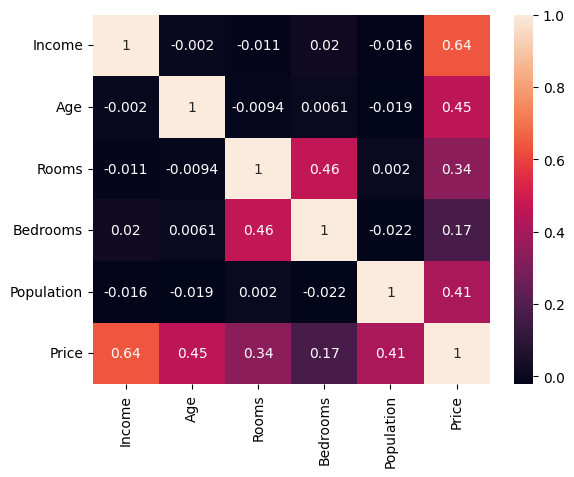

In [29]:
import copy
old = list(df.columns)
new = ['Income', 'Age', 'Rooms', 'Bedrooms', 'Population', 'Price']
df1 = df.copy()
df1 = df1.rename(columns=dict(zip(old, new)))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


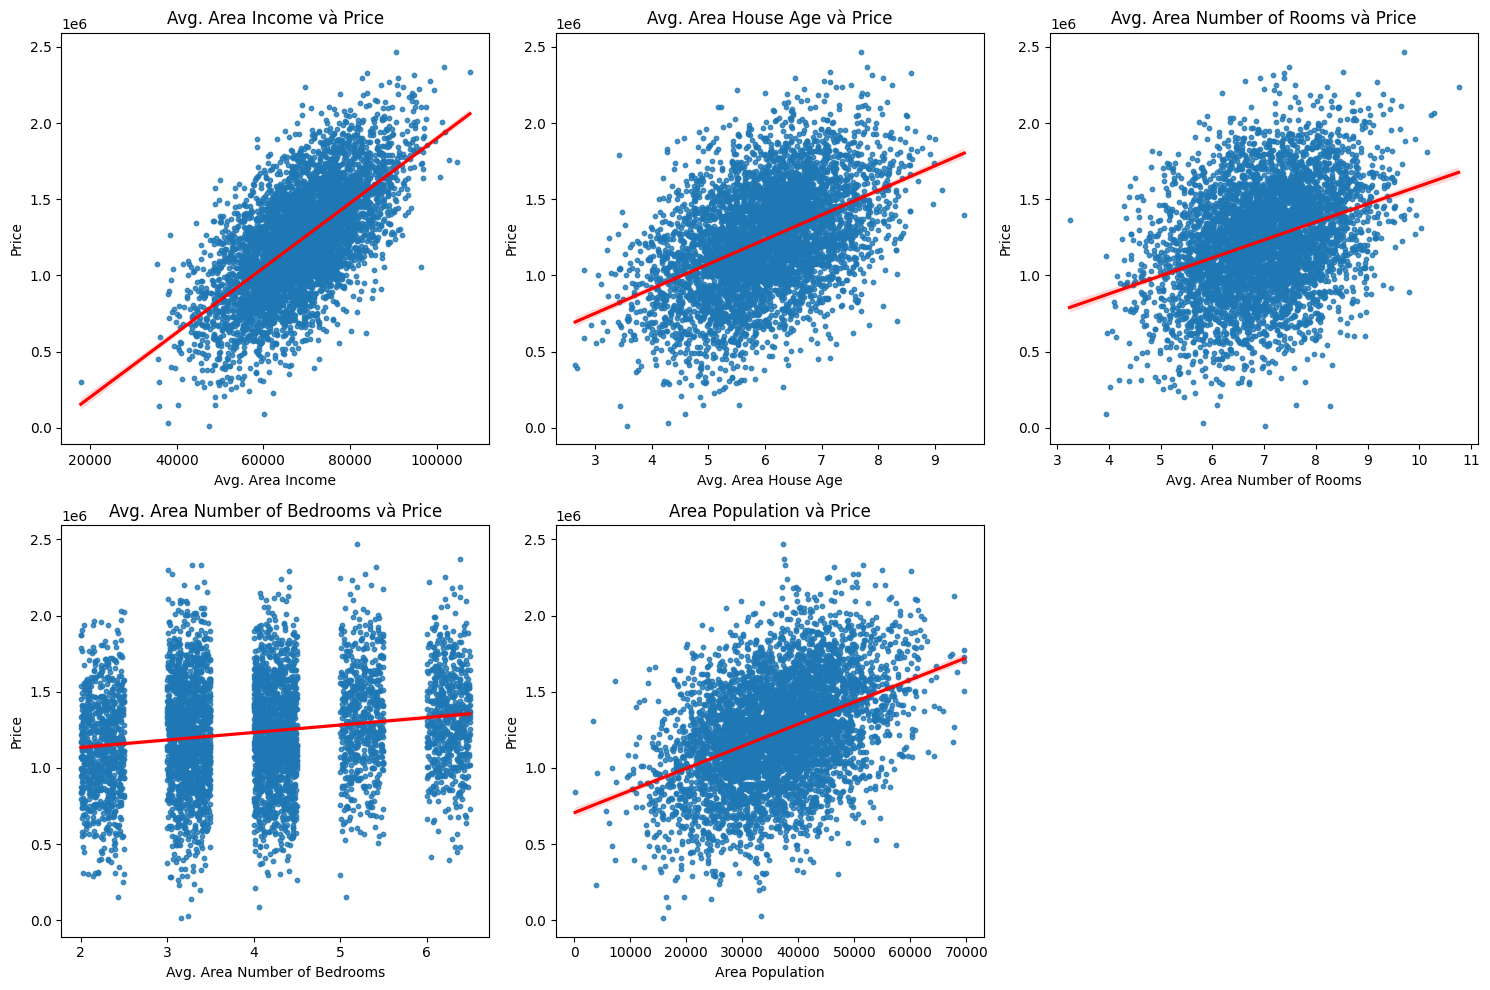

In [31]:
columns_to_plot = list(df.columns)
# Tạo một grid 2x4 để hiển thị các biểu đồ
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    if column != "Price":
        plt.subplot(2, 3, i)
        sns.regplot(x=column, y='Price', data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
        plt.title(f'{column} và Price')
        plt.tight_layout()

plt.show()

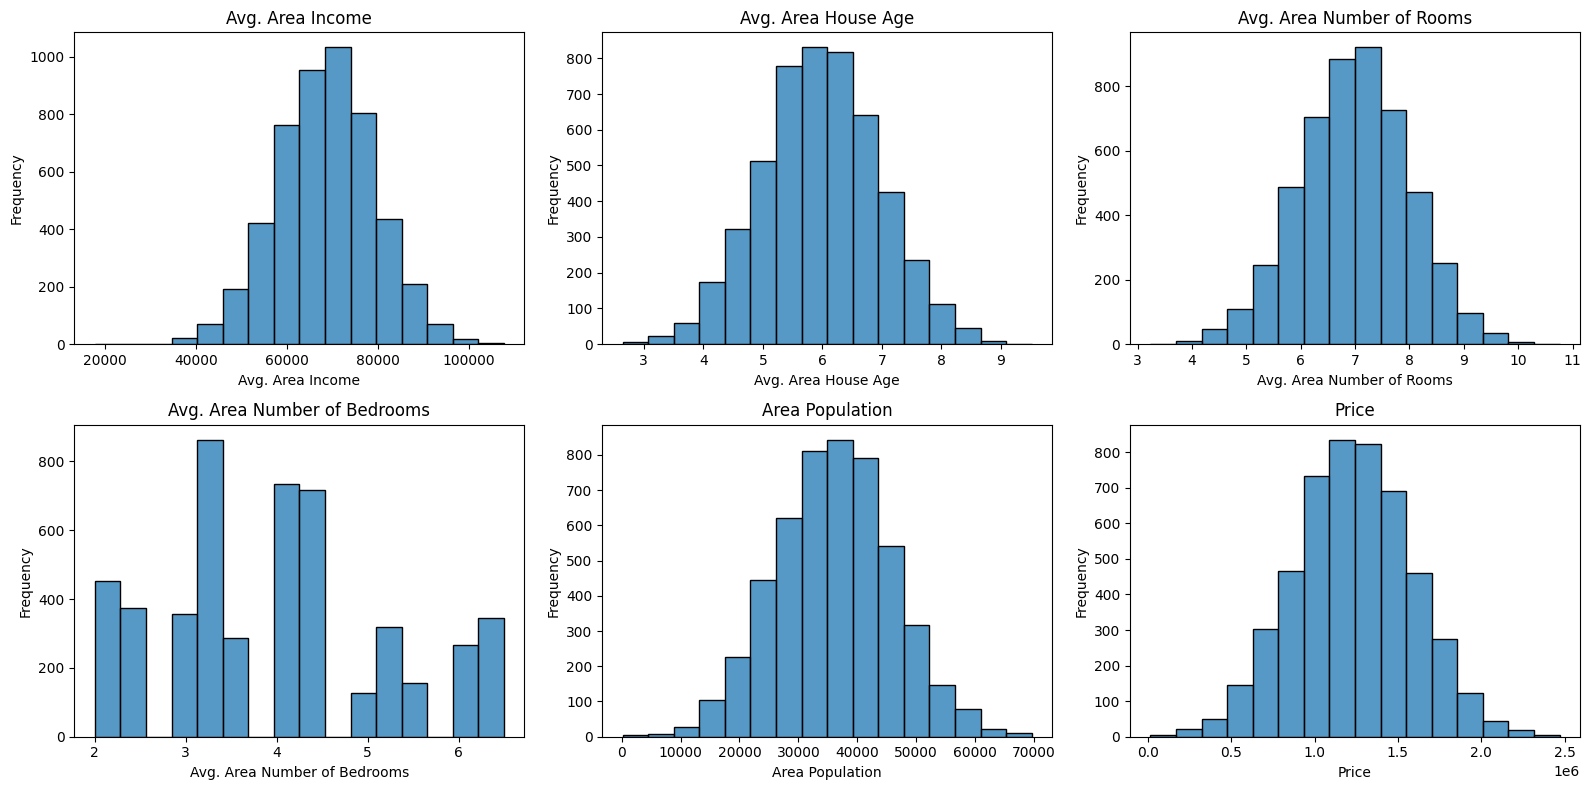

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Số lượng cột trong DataFrame
num_columns = len(df.columns)

# Xác định số hàng và số cột cho subplot
num_rows = (num_columns + 2) // 3  # Sử dụng 3 cột
num_cols = 3

# Tạo một figure với số hàng và số cột tương ứng
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Duyệt qua các cột và vẽ biểu đồ
for i, ax in zip(df.columns, axes.flatten()):
    sns.histplot(data=df, x=i, bins=16, ax=ax)  # Thêm màu sắc đẹp cho biểu đồ
    ax.set_title(i)
    ax.set_xlabel(i)
    ax.set_ylabel("Frequency")

# Xóa các ô trống nếu số cột không chia hết cho số cột trong subplot
for j in range(num_columns, len(axes.flatten())):
    axes.flatten()[j].axis('off')

# Tăng khoảng cách giữa các hàng
plt.subplots_adjust(hspace=1.0)  # Điều chỉnh giá trị hspace để tăng khoảng cách

plt.tight_layout()
plt.show()


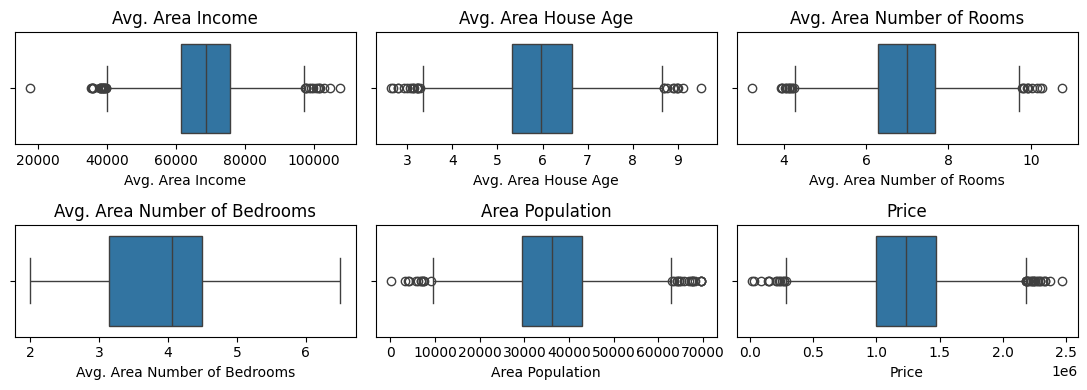

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Số lượng cột trong DataFrame
num_columns = len(df.columns)

# Xác định số hàng và số cột cho subplot
num_rows = (num_columns + 2) // 3  # Sử dụng 3 cột
num_cols = 3

# Tạo một figure với số hàng và số cột tương ứng
fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, num_rows * 2))

# Duyệt qua các cột và vẽ biểu đồ
for i, ax in zip(df.columns, axes.flatten()):
    sns.boxplot(data=df, x=i, ax=ax)
    ax.set_title(i)

# Xóa các ô trống nếu số cột không chia hết cho số cột trong subplot
for j in range(num_columns, len(axes.flatten())):
    axes.flatten()[j].axis('off')

# Tăng khoảng cách giữa các hàng
plt.subplots_adjust(hspace=1.0)  # Điều chỉnh giá trị hspace để tăng khoảng cách

plt.tight_layout()
plt.show()


# Xây dựng mô hình hồi quy tuyến tính

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

old = list(df.columns)
attributes = ['Income', 'Age', 'Rooms', 'Bedrooms', 'Population', 'Price']
new = ["x1", "x2", 'x3', 'x4', 'x5', 'y']
df2 = df.copy()
df2 = df2.rename(columns=dict(zip(old, new)))

X = df2
y = df2['y']

from sklearn.feature_selection import SelectKBest, f_regression
list_feature = []
feature_X_new = X.shape[1]
print(feature_X_new)

for i in range(1, feature_X_new):
    k_best = SelectKBest(score_func=f_regression, k=i)
    X_select = k_best.fit_transform(X, y)
    best_feature_names = X.columns[k_best.get_support()]
    list_feature.append(best_feature_names)

def rate(y_test, y_test_predict, y_train, y_train_predict):
    # RMSE trên tập test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    # RMSE trên tập train
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
    # R2 Score trên tập train
    r2_train = r2_score(y_train, y_train_predict)
    # R2 Score trên tập test
    r2_test = r2_score(y_test, y_test_predict)
    
    # In kết quả
    print(f"RMSE Train: {rmse_train:.2f}")
    print(f"R2 Score Train: {r2_train:.2f}")
    print(f"RMSE Test: {rmse_test:.2f}")
    print(f"R2 Score Test: {r2_test:.2f}")

def all_result(best_feature_names, X_new, y_new):
    x = X_new[best_feature_names]
    y = y_new

    x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state = 42)

    scaler = MinMaxScaler()
    x_train_2 = scaler.fit_transform(x_train_2)
    x_test_2 = scaler.transform(x_test_2)

    re_2feature = LinearRegression()
    re_2feature.fit(x_train_2, y_train_1)

    y_test_predict = re_2feature.predict(x_test_2)
    Y_train_predict = re_2feature.predict(x_train_2)
    rate(y_test_1, y_test_predict, y_train_1, Y_train_predict)

    # Xác định phương trình hồi quy
    coefficients = re_2feature.coef_  # Hệ số của các đặc trưng
    intercept = re_2feature.intercept_  # Hệ số chặn
    feature_equation = " + ".join(
    [f"{coef:.2f} * {feature}" for coef, feature in zip(coefficients, best_feature_names)]
    )
    regression_equation = f"y = {intercept:.2f} + {feature_equation}"

    print(f"Phương trình hồi quy tuyến tính: {regression_equation}")

for i in range(len(new)):
    print(f"{new[i]}: {attributes[i]}")
print("=====================")
for i in list_feature:
    all_result(i, X, y)
    print("=====================")

6
x1: Income
x2: Age
x3: Rooms
x4: Bedrooms
x5: Population
y: Price
RMSE Train: 271139.97
R2 Score Train: 0.41
RMSE Test: 272387.38
R2 Score Test: 0.40
Phương trình hồi quy tuyến tính: y = 152393.38 + 1843183.18 * x1
RMSE Train: 219197.17
R2 Score Train: 0.62
RMSE Test: 218363.68
R2 Score Test: 0.61
Phương trình hồi quy tuyến tính: y = -378762.98 + 1847547.13 * x1 + 1098222.59 * x2
RMSE Train: 158655.03
R2 Score Train: 0.80
RMSE Test: 158799.18
R2 Score Test: 0.80
Phương trình hồi quy tuyến tính: y = -947300.34 + 1874064.88 * x1 + 1114344.80 * x2 + 1053998.98 * x5
RMSE Train: 101308.08
R2 Score Train: 0.92
RMSE Test: 100367.93
R2 Score Test: 0.92
Phương trình hồi quy tuyến tính: y = -1413942.65 + 1882364.28 * x1 + 1125911.57 * x2 + 852330.76 * x3 + 1060175.67 * x5
RMSE Train: 101273.49
R2 Score Train: 0.92
RMSE Test: 100444.06
R2 Score Test: 0.92
Phương trình hồi quy tuyến tính: y = -1413286.26 + 1881708.61 * x1 + 1125667.50 * x2 + 842611.01 * x3 + 10981.70 * x4 + 1060509.57 * x5


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import time

# 1. Chọn thuộc tính và biến phụ thuộc
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
          'Avg. Area Number of Bedrooms', 'Area Population']].values
y = df['Price'].values

# 2. Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Khởi tạo mô hình và thông số
model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# 4. Lưu kết quả
train_times = []
test_times = []
rmse_results = []
r2_results = []

# 5. Đánh giá mô hình
fold_details = []
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Huấn luyện và kiểm tra thời gian
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    train_times.append(train_time)

    start_test = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_test
    test_times.append(test_time)

    # Tính RMSE và R2
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_results.append(rmse)
    r2_results.append(r2)

    # Lưu chi tiết từng fold
    fold_details.append({
        'Fold': len(fold_details) + 1,
        'Train Time': train_time,
        'Test Time': test_time,
        'RMSE': rmse,
        'R2': r2
    })

# 6. Tính trung bình kết quả
average_rmse = np.mean(rmse_results)
average_r2 = np.mean(r2_results)
average_train_time = np.mean(train_times)
average_test_time = np.mean(test_times)

# 7. Tạo bảng chi tiết
df_details = pd.DataFrame(fold_details)
print("\n=============== Bảng chi tiết từng fold ===============")
print(df_details)
print("=======================================================")
print("\n")

# 8. In kết quả tổng hợp
print("=========== Kết quả tổng hợp ==========")
print(f"Trung bình RMSE: {average_rmse:.4f}")
print(f"Trung bình R2: {average_r2:.4f}")
print(f"Thời gian train trung bình: {average_train_time:.4f} giây")
print(f"Thời gian test trung bình: {average_test_time:.4f} giây")
print("=======================================")



=============== Bảng chi tiết từng fold ===============
   Fold  Train Time  Test Time           RMSE        R2
0     1    0.001001   0.001000  101609.987606  0.918164
1     2    0.002000   0.000000   99155.074954  0.917995
2     3    0.000993   0.000000  100406.350633  0.906619
3     4    0.002005   0.000000  101344.811049  0.921254
4     5    0.001004   0.000999  104257.727251  0.901544
5     6    0.001000   0.000000  102871.999281  0.919678
6     7    0.000999   0.000000   98505.938636  0.923458
7     8    0.002003   0.000998  103818.177336  0.915252
8     9    0.002001   0.000000  102639.675035  0.921360
9    10    0.002002   0.000000   97507.328119  0.927343


=========== Kết quả tổng hợp ==========
Trung bình RMSE: 101211.7070
Trung bình R2: 0.9173
Thời gian train trung bình: 0.0015 giây
Thời gian test trung bình: 0.0003 giây


# Cải thiện mô hình

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys

df = pd.read_csv('USA_Housing.csv')

if not sys.warnoptions:
    warnings.simplefilter("ignore")

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('min_max_scalar', MinMaxScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
coefs = list(lin_reg.coef_)

import tkinter as tk
from tkinter import messagebox
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df = df.drop(columns=["Address", "Price"])
max_arr = []
min_arr = []
max_val_arr = []
min_val_arr = []

for i in list(df.columns):
    # q1 = df[i].quantile(0.25)
    # q3 = df[i].quantile(0.75)
    # iqr = q3-q1
    # min_val = q1 - 1.5 * iqr
    # max_val = q3 + 1.5 * iqr
    # min_arr.append(min_val)
    # max_arr.append(max_val)
    min_arr.append(df[i].min())
    max_arr.append(df[i].max())

print(min_arr)
print(max_arr)


def min_max_normalization(input, max_val, min_val):
    return (input - min_val)/ (max_val - min_val)

def check_input(max_in, min_in, input):
    if input >= max_in or input <= min_in:
        return True
    return False

def predict():
    try:

        avg_income = float(entry_income.get().strip())
        check1 = check_input(max_arr[0], min_arr[0], avg_income)
        avg_income = min_max_normalization(avg_income, max_arr[0], min_arr[0],)
        house_age = float(entry_house_age.get().strip())
        check2 = check_input(max_arr[1], min_arr[1], house_age)
        house_age = min_max_normalization(house_age, max_arr[1], min_arr[1])
        num_rooms = float(entry_num_rooms.get().strip())
        check3 = check_input(max_arr[2], min_arr[2], num_rooms)
        num_rooms = min_max_normalization(num_rooms, max_arr[2], min_arr[2])
        num_bedrooms = float(entry_num_bedrooms.get().strip())
        check4 = check_input(max_arr[3], min_arr[3], num_bedrooms)
        num_bedrooms = min_max_normalization(num_bedrooms, max_arr[3], min_arr[3])
        area_population = float(entry_area_population.get().strip())
        check5 = check_input(max_arr[4], min_arr[4], area_population)
        area_population = min_max_normalization(area_population, max_arr[4], min_arr[4])
        print( check1, check2, check3,check4,check5)
        # if check1 or check2 or check3 or check4 or check5:
        #     messagebox.showwarning("Warning", "Please enter values within the recommended range to ensure the accuracy of the results!")
        # y = (-1413286.26 + 1881708.61 * avg_income + 1125667.50 * house_age + 842611.01 * num_rooms
        #      + 10981.70 * num_bedrooms + 1060509.57 * area_population)
        y = -1413286.26 + 1881708.61 * avg_income + 1125667.50 * house_age + 842611.01 * num_rooms + 10981.70 * num_bedrooms + 1060509.57 * area_population
        if y<0 :
            messagebox.showwarning('Warning', 'Do giá trị nhập không thực tế trong ngữ cảnh dự đoán giá nhà, do đó được điều chỉnh về 0 để đúng với ý nghĩa thực tế!')
            y=0
        lbl_name_equation.config(text="Linear Regression Equation:")
        lbl_name_result.config(text="Price Prediction Result:")
        lbl_result.config(text=y)
        lbl_equation.config(
            text=f"y = {round(lin_reg.intercept_, 2)} + {round(coefs[0], 2)} * x1 + {round(coefs[1], 2)} * x2 + \n{round(coefs[2], 2)} * x3 + {round(coefs[3], 2)} * x4 + {round(coefs[4], 2)} * x5")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values!")


# Hàm tăng/giảm giá trị
def adjust_scale(scale, increment):
    current_value = scale.get()
    scale.set(current_value + increment)

# Tạo cửa sổ chính
root = tk.Tk()
root.title("Prediction House")
# root.geometry("500x500")
root.config(bg="#f7f7f7")

# Tiêu đề giao diện
lbl_title = tk.Label(root, text="House Prediction Interface", font=("Helvetica", 16, "bold"), fg="#4CAF50",bg="#f7f7f7")
lbl_title.grid(row=0, column=0, columnspan=3, pady=20)

# Avg. Area Income (Nhập trực tiếp)
lbl_avg_income = tk.Label(root, text="Avg. Area Income (x1):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_avg_income.grid(row=1, column=0, sticky="w", padx=20, pady=10)

entry_income = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_income.grid(row=1, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_income = tk.Label(root, text=f"Suggest: {round(min_arr[0],2), round(max_arr[0],2)}")
lbl_advance_income.grid(row=2, column=1, columnspan=2, sticky="ew", padx=20)

# Avg. Area House Age
lbl_house_age = tk.Label(root, text="Avg. Area House Age (x2):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_house_age.grid(row=3, column=0, sticky="w", padx=20, pady=10)
entry_house_age = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_house_age.grid(row=3, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_house_age = tk.Label(root, text=f"Suggest: {round(min_arr[1],2), round(max_arr[1],2)}")
lbl_advance_house_age.grid(row=4, column=1, columnspan=2, sticky="ew", padx=20)

# Avg. Area Number of Rooms
lbl_num_rooms = tk.Label(root, text="Avg. Area Number of Rooms (x3):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_num_rooms.grid(row=5, column=0, sticky="w", padx=20, pady=10)
entry_num_rooms = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_num_rooms.grid(row=5, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_num_rooms = tk.Label(root, text=f"Suggest: {round(min_arr[2],2), round(max_arr[2],2)}")
lbl_advance_num_rooms.grid(row=6, column=1, columnspan=2, sticky="ew", padx=20)

# Avg. Area Number of Bedrooms
lbl_num_bedrooms = tk.Label(root, text="Avg. Area Number of Bedrooms (x4):", font=("Helvetica", 11, "bold"),bg="#f7f7f7")
lbl_num_bedrooms.grid(row=7, column=0, sticky="w", padx=20, pady=10)
entry_num_bedrooms = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_num_bedrooms.grid(row=7, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_num_bedrooms = tk.Label(root, text=f"Suggest: {round(min_arr[3],2), round(max_arr[3],2)}")
lbl_advance_num_bedrooms.grid(row=8, column=1, columnspan=2, sticky="ew", padx=20)

# Area Population (Nhập trực tiếp)
lbl_area_population = tk.Label(root, text="Area Population (x5):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_area_population.grid(row=9, column=0, sticky="w", padx=20, pady=10)
entry_area_population = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_area_population.grid(row=9, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_population = tk.Label(root, text=f"Suggest: {round(min_arr[4],2), round(max_arr[4],2)}")
lbl_advance_population.grid(row=10, column=1, columnspan=2, sticky="ew", padx=20)

# Nút Predict
btn_predict = tk.Button(root, text="Predict", command=predict, font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white",width=15)
btn_predict.grid(row=11, column=0, columnspan=3, pady=20)

# Nhãn kết quả dự đoán
lbl_name_equation = tk.Label(root, text="", font=("Helvetica", 13, "bold"), bg="#f7f7f7", anchor="w", justify="left")
lbl_name_equation.grid(row=12, column=0, columnspan=3, pady=5, padx=20)
lbl_result = tk.Label(root, text="", font=("Helvetica", 13), bg="#f7f7f7", anchor="w", justify="left")
lbl_result.grid(row=15, column=0, columnspan=3, pady=5, padx=20)
lbl_name_result = tk.Label(root, text="", font=("Helvetica", 13, "bold"), bg="#f7f7f7", anchor="w", justify="left")
lbl_name_result.grid(row=14, column=0, columnspan=3, pady=5, padx=20)
lbl_equation = tk.Label(root, text="", font=("Helvetica", 13,), bg="#f7f7f7", anchor="w", justify="left")
lbl_equation.grid(row=13, column=0, columnspan=3, pady=5, padx=20)

# Cấu hình cột co giãn
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=4)
root.grid_columnconfigure(2, weight=1)

# Chạy giao diện
root.mainloop()

[17796.631189543397, 2.644304186036705, 3.2361940234262048, 2.0, 172.61068627290044]
[107701.74837763936, 9.51908806613594, 10.759588335938624, 6.5, 69621.7133777904]


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Đổi tên cột cho tiện
old = list(df.columns)
attributes = ['Income', 'Age', 'Rooms', 'Bedrooms', 'Population', 'Price']
new = ["x1", "x2", 'x3', 'x4', 'x5', 'y']
df2 = df.copy()
df2 = df2.rename(columns=dict(zip(old, new)))

# Tăng cường dữ liệu bằng cách thêm nhiễu Gaussian
def augment_data(X, y, num_samples=5):
    X_augmented = X.copy()
    y_augmented = y.copy()
    
    for _ in range(num_samples):
        noise = np.random.normal(0, 0.1, X.shape)
        X_new = X + noise
        X_augmented = np.vstack((X_augmented, X_new))
        y_augmented = np.hstack((y_augmented, y))
    
    return X_augmented, y_augmented

# Áp dụng tăng cường dữ liệu
X = df2.drop(columns=['y']).values
y = df2['y'].values
X_augmented, y_augmented = augment_data(X, y)

# Feature Engineering - Tạo các đặc trưng tương tác và log
def feature_engineering(X):
    # Tạo các đặc trưng tương tác giữa các đặc trưng
    X_interaction = np.column_stack([X[:, 1] / X[:, 3]])

    # Biến đổi logarit cho các đặc trưng có phân phối lệch
    X_log = np.log1p(X)  # Tránh log(0) bằng cách sử dụng log1p

    # Kết hợp các đặc trưng ban đầu, đặc trưng tương tác và biến đổi logarit
    X_new = np.column_stack([X, X_interaction, X_log])
    
    return X_new

# Áp dụng Feature Engineering
X_augmented = feature_engineering(X_augmented)

# Định nghĩa tên các đặc trưng đã tạo
original_feature_names = new[:-1]  # Tên các đặc trưng gốc
interaction_feature_names = ['x2/x4']  # Tên các đặc trưng tương tác
log_feature_names = [f'log_{name}' for name in original_feature_names]  # Tên các đặc trưng logarit
all_feature_names = np.array(original_feature_names + interaction_feature_names + log_feature_names)

# Lựa chọn đặc trưng tốt nhất
def select_best_features(X, y, k=10):
    k_best = SelectKBest(score_func=f_regression, k=k)
    X_selected = k_best.fit_transform(X, y)
    best_feature_names = all_feature_names[k_best.get_support()]
    return X_selected, best_feature_names

# Áp dụng chọn lọc đặc trưng
X_selected, best_feature_names = select_best_features(X_augmented, y_augmented, k=10)

def rate(y_test, y_test_predict, y_train, y_train_predict):
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
    r2 = r2_score(y_test, y_test_predict)
    
    print(f"RMSE Test: {rmse_test:.2f}")
    print(f"RMSE Train: {rmse_train:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Huấn luyện mô hình và đánh giá
def all_result(X_new, y_new, best_feature_names):
    x = pd.DataFrame(X_new, columns=best_feature_names)
    y = y_new

    x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=3)

    scaler = MinMaxScaler()
    x_train_2 = scaler.fit_transform(x_train_2)
    x_test_2 = scaler.transform(x_test_2)

    re_2feature = LinearRegression()
    re_2feature.fit(x_train_2, y_train_1)

    y_test_predict = re_2feature.predict(x_test_2)
    y_train_predict = re_2feature.predict(x_train_2)
    rate(y_test_1, y_test_predict, y_train_1, y_train_predict)

    coefficients = re_2feature.coef_
    intercept = re_2feature.intercept_
    feature_equation = " + ".join([f"{coef:.2f} * {feature}" for coef, feature in zip(coefficients, best_feature_names)])
    regression_equation = f"y = {intercept:.2f} + {feature_equation}"

    print(f"Phương trình hồi quy tuyến tính: {regression_equation}")

# In kết quả
print("=====================")
all_result(X_selected, y_augmented, best_feature_names)


RMSE Test: 103999.99
RMSE Train: 102385.15
R2 Score: 0.92
Phương trình hồi quy tuyến tính: y = -1419849.26 + 2059647.97 * x1 + 1291301.21 * x2 + 1029898.39 * x3 + -28415.78 * x4 + 1027496.30 * x5 + -162588.95 * log_x1 + -136426.72 * log_x2 + -110958.23 * log_x3 + 38710.79 * log_x4 + 85652.11 * log_x5


# Chương trình Demo

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys

df = pd.read_csv('USA_Housing.csv')

if not sys.warnoptions:
    warnings.simplefilter("ignore")

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



from sklearn import metrics
from sklearn.model_selection import cross_val_score


def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()


def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('min_max_scalar', MinMaxScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
coefs = list(lin_reg.coef_)

import tkinter as tk
from tkinter import messagebox
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df = df.drop(columns=["Address", "Price"])
max_arr = []
min_arr = []
max_val_arr = []
min_val_arr = []

for i in list(df.columns):
    # q1 = df[i].quantile(0.25)
    # q3 = df[i].quantile(0.75)
    # iqr = q3-q1
    # min_val = q1 - 1.5 * iqr
    # max_val = q3 + 1.5 * iqr
    # min_arr.append(min_val)
    # max_arr.append(max_val)
    min_arr.append(df[i].min())
    max_arr.append(df[i].max())

print(min_arr)
print(max_arr)


def min_max_normalization(input, max_val, min_val):
    return (input - min_val)/ (max_val - min_val)

def check_input(max_in, min_in, input):
    if input >= max_in or input <= min_in:
        return True
    return False

def predict():
    try:
        avg_income = float(entry_income.get().strip())
        house_age = float(entry_house_age.get().strip())
        num_rooms = float(entry_num_rooms.get().strip())
        num_bedrooms = float(entry_num_bedrooms.get().strip())
        area_population = float(entry_area_population.get().strip())
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values for all fields!")
        return

    try:
        check1 = check_input(max_arr[0], min_arr[0], avg_income)
        avg_income = min_max_normalization(avg_income, max_arr[0], min_arr[0])
        check2 = check_input(max_arr[1], min_arr[1], house_age)
        house_age = min_max_normalization(house_age, max_arr[1], min_arr[1])
        check3 = check_input(max_arr[2], min_arr[2], num_rooms)
        num_rooms = min_max_normalization(num_rooms, max_arr[2], min_arr[2])
        check4 = check_input(max_arr[3], min_arr[3], num_bedrooms)
        num_bedrooms = min_max_normalization(num_bedrooms, max_arr[3], min_arr[3])
        check5 = check_input(max_arr[4], min_arr[4], area_population)
        area_population = min_max_normalization(area_population, max_arr[4], min_arr[4])

        if check1 or check2 or check3 or check4 or check5:
            messagebox.showwarning(
                "Warning",
                "Please enter values within the recommended range to ensure the accuracy of the results!"
            )

        y = (-1413286.26 + 1881708.61 * avg_income + 1125667.50 * house_age +
             842611.01 * num_rooms + 10981.70 * num_bedrooms + 1060509.57 * area_population)
        if y < 0:
            messagebox.showinfo(
                'Message',
                'The input values are unrealistic for predicting house prices. The result is adjusted to 0 for practical interpretation.'
            )
            y = 0

        lbl_name_equation.config(text="Linear Regression Equation:")
        lbl_name_result.config(text="Price Prediction Result:")
        lbl_result.config(text=f"${y:,.2f}")
        lbl_equation.config(
            text=f"y = {round(lin_reg.intercept_, 2)} + {round(coefs[0], 2)} * x1 + {round(coefs[1], 2)} * x2 "
                 f"+ \n{round(coefs[2], 2)} * x3 + {round(coefs[3], 2)} * x4 + {round(coefs[4], 2)} * x5"
        )

    except Exception as e:
        messagebox.showerror("Error", f"An unexpected error occurred: {e}")



# Hàm tăng/giảm giá trị
def adjust_scale(scale, increment):
    current_value = scale.get()
    scale.set(current_value + increment)

def reset_fields():
    entry_income.delete(0, tk.END)
    entry_house_age.delete(0, tk.END)
    entry_num_rooms.delete(0, tk.END)
    entry_num_bedrooms.delete(0, tk.END)
    entry_area_population.delete(0, tk.END)

    lbl_name_equation.config(text="")
    lbl_name_result.config(text="")
    lbl_result.config(text="")
    lbl_equation.config(text="")

# Tạo cửa sổ chính
root = tk.Tk()
root.title("Prediction House")
# root.geometry("500x500")
root.config(bg="#f7f7f7")

# Tiêu đề giao diện
lbl_title = tk.Label(root, text="House Prediction Interface", font=("Helvetica", 16, "bold"), fg="#4CAF50",bg="#f7f7f7")
lbl_title.grid(row=0, column=0, columnspan=3, pady=20)

# Avg. Area Income (Nhập trực tiếp)
lbl_avg_income = tk.Label(root, text="Avg. Area Income (x1):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_avg_income.grid(row=1, column=0, sticky="w", padx=20, pady=10)

entry_income = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_income.grid(row=1, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_income = tk.Label(root, text=f"Suggest: {round(min_arr[0],2), round(max_arr[0],2)}")
lbl_advance_income.grid(row=2, column=1, columnspan=2, sticky="ew", padx=20)

# frame_income = tk.Frame(root, bg="#f7f7f7")
# frame_income.grid(row=1, column=1, columnspan=2, sticky="ew", padx=20)
# tk.Button(frame_income, text="-", command=lambda: adjust_scale(scale_income, -1), width=3).pack(side="left", padx=2)
# scale_income = tk.Scale(frame_income, from_=min_arr[0], to=max_arr[0], orient="horizontal", resolution=0.01,bg="#f7f7f7")
# scale_income.pack(side="left", fill="x", expand=True)
# tk.Button(frame_income, text="+", command=lambda: adjust_scale(scale_income, 1), width=3).pack(side="left", padx=2)

# Avg. Area House Age
lbl_house_age = tk.Label(root, text="Avg. Area House Age (x2):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_house_age.grid(row=3, column=0, sticky="w", padx=20, pady=10)
entry_house_age = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_house_age.grid(row=3, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_house_age = tk.Label(root, text=f"Suggest: {round(min_arr[1],2), round(max_arr[1],2)}")
lbl_advance_house_age.grid(row=4, column=1, columnspan=2, sticky="ew", padx=20)

# frame_house_age = tk.Frame(root, bg="#f7f7f7")
# frame_house_age.grid(row=2, column=1, columnspan=2, sticky="ew", padx=20)
# tk.Button(frame_house_age, text="-", command=lambda: adjust_scale(scale_house_age, -1), width=3).pack(side="left",                                                                                                 padx=2)
# scale_house_age = tk.Scale(frame_house_age, from_=min_arr[1], to=max_arr[1], orient="horizontal", resolution=0.01,bg="#f7f7f7")
# scale_house_age.pack(side="left", fill="x", expand=True)
# tk.Button(frame_house_age, text="+", command=lambda: adjust_scale(scale_house_age, 1), width=3).pack(side="left",padx=2)

# Avg. Area Number of Rooms
lbl_num_rooms = tk.Label(root, text="Avg. Area Number of Rooms (x3):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_num_rooms.grid(row=5, column=0, sticky="w", padx=20, pady=10)
entry_num_rooms = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_num_rooms.grid(row=5, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_num_rooms = tk.Label(root, text=f"Suggest: {round(min_arr[2],2), round(max_arr[2],2)}")
lbl_advance_num_rooms.grid(row=6, column=1, columnspan=2, sticky="ew", padx=20)
# frame_num_rooms = tk.Frame(root, bg="#f7f7f7")
# frame_num_rooms.grid(row=3, column=1, columnspan=2, sticky="ew", padx=20)
# tk.Button(frame_num_rooms, text="-", command=lambda: adjust_scale(scale_num_rooms, -1), width=3).pack(side="left",
#                                                                                                       padx=2)
# scale_num_rooms = tk.Scale(frame_num_rooms, from_=min_arr[2], to=max_arr[2], orient="horizontal", resolution=0.01,bg="#f7f7f7")
# scale_num_rooms.pack(side="left", fill="x", expand=True)
# tk.Button(frame_num_rooms, text="+", command=lambda: adjust_scale(scale_num_rooms, 1), width=3).pack(side="left",padx=2)

# Avg. Area Number of Bedrooms
lbl_num_bedrooms = tk.Label(root, text="Avg. Area Number of Bedrooms (x4):", font=("Helvetica", 11, "bold"),bg="#f7f7f7")
lbl_num_bedrooms.grid(row=7, column=0, sticky="w", padx=20, pady=10)
entry_num_bedrooms = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_num_bedrooms.grid(row=7, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_num_bedrooms = tk.Label(root, text=f"Suggest: {round(min_arr[3],2), round(max_arr[3],2)}")
lbl_advance_num_bedrooms.grid(row=8, column=1, columnspan=2, sticky="ew", padx=20)

# frame_num_bedrooms = tk.Frame(root, bg="#f7f7f7")
# frame_num_bedrooms.grid(row=4, column=1, columnspan=2, sticky="ew", padx=20)
# tk.Button(frame_num_bedrooms, text="-", command=lambda: adjust_scale(scale_num_bedrooms, -1), width=3).pack(side="left",padx=2)
# scale_num_bedrooms = tk.Scale(frame_num_bedrooms, from_=min_arr[3], to=max_arr[3], orient="horizontal", resolution=0.01,bg="#f7f7f7")
# scale_num_bedrooms.pack(side="left", fill="x", expand=True)
# tk.Button(frame_num_bedrooms, text="+", command=lambda: adjust_scale(scale_num_bedrooms, 1), width=3).pack(side="left",padx=2)

# Area Population (Nhập trực tiếp)
lbl_area_population = tk.Label(root, text="Area Population (x5):", font=("Helvetica", 11, "bold"), bg="#f7f7f7")
lbl_area_population.grid(row=9, column=0, sticky="w", padx=20, pady=10)
entry_area_population = tk.Entry(root, font=("Helvetica", 11), bd=2, relief="solid")
entry_area_population.grid(row=9, column=1, columnspan=2, sticky="ew", padx=20)
lbl_advance_population = tk.Label(root, text=f"Suggest: {round(min_arr[4],2), round(max_arr[4],2)}")
lbl_advance_population.grid(row=10, column=1, columnspan=2, sticky="ew", padx=20)

# Frame chứa nút Predict và Reset
frame_buttons = tk.Frame(root, bg="#f7f7f7")
frame_buttons.grid(row=11, column=0, columnspan=3, pady=10)

btn_predict = tk.Button(frame_buttons, text="Predict", command=predict, font=("Helvetica", 12, "bold"),
                         bg="#4CAF50", fg="white", width=10)
btn_predict.pack(side="left", padx=10)

btn_reset = tk.Button(frame_buttons, text="Reset", command=reset_fields, font=("Helvetica", 12, "bold"),
                       bg="red", fg="white", width=10)
btn_reset.pack(side="left", padx=10)


# Nhãn kết quả dự đoán
lbl_name_equation = tk.Label(root, text="", font=("Helvetica", 13, "bold"), bg="#f7f7f7", anchor="w", justify="left")
lbl_name_equation.grid(row=12, column=0, columnspan=3, pady=5, padx=20)
lbl_result = tk.Label(root, text="", font=("Helvetica", 13), bg="#f7f7f7", anchor="w", justify="left")
lbl_result.grid(row=15, column=0, columnspan=3, pady=5, padx=20)
lbl_name_result = tk.Label(root, text="", font=("Helvetica", 13, "bold"), bg="#f7f7f7", anchor="w", justify="left")
lbl_name_result.grid(row=14, column=0, columnspan=3, pady=5, padx=20)
lbl_equation = tk.Label(root, text="", font=("Helvetica", 13,), bg="#f7f7f7", anchor="w", justify="left")
lbl_equation.grid(row=13, column=0, columnspan=3, pady=5, padx=20)

# Cấu hình cột co giãn
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=4)
root.grid_columnconfigure(2, weight=1)

# Chạy giao diện
root.mainloop()


[17796.631189543397, 2.644304186036705, 3.2361940234262048, 2.0, 172.61068627290044]
[107701.74837763936, 9.51908806613594, 10.759588335938624, 6.5, 69621.7133777904]
